# Exploratory Data Analysis (EDA) for the dataset `trabalho2_dados_7.csv` of instagram posts.


In [91]:
from functools import reduce

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trabalho2_dados_7.csv')

### Check data types and null values

In [92]:
df.describe()

,id,engagement_score_view,followers,likes,num_comments,video_view_count,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,is_vape_related,sensitive_content_bool
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.000000
mean,1101.923571,19.764286,2119.847143,21.001429,1.147143,19.764286,0.432857,0.290000,0.070714,0.272143,0.154286,0.840714,0.037143,1.0,0.048571
std,616.899821,301.491250,16349.970442,81.740353,4.281523,301.491250,0.495648,0.453924,0.256439,0.445222,0.361351,0.366073,0.189179,0.0,0.215047
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,583.000000,0.000000,158.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
50%,1113.000000,0.000000,417.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
75%,1635.000000,0.000000,1167.500000,14.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000
max,2132.000000,7771.000000,563673.000000,1768.000000,63.000000,7771.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [93]:
print(df.dtypes)

id                             int64
url                           object
display_url                   object
content_type                  object
engagement_score_view          int64
followers                      int64
likes                          int64
num_comments                   int64
product_type                  object
profile_image_link            object
video_view_count               int64
videos                        object
tags                          object
has_a_person                   int64
vape_present                   int64
is_vaping                      int64
tone                          object
img_mentions_brands            int64
text_mentions_brands           int64
Health_ad                      int64
target_demographic            object
location_type                 object
emotion_displayed             object
type_of_content               object
stance                        object
are_there_children             int64
post_style                    object
p

In [94]:
df

,id,url,display_url,content_type,engagement_score_view,followers,likes,num_comments,product_type,profile_image_link,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,189,https://www.instagram.com/p/CJ80XswANaO/,https://www.instagram.com/p/CJ80XswANaO/media/...,Image,0,1792,3,0,NaN,https://scontent-man2-1.cdninstagram.com/v/t51...,...,Informational Announcement,[],[],[],[],[],[],NaN,1,0
1,1340,https://www.instagram.com/p/C3V6TndvA6B/,https://www.instagram.com/p/C3V6TndvA6B/media/...,Image,0,159,2,0,NaN,https://instagram.flpb1-1.fna.fbcdn.net/v/t51....,...,"Informational, Educational",[],[],[],[],[],[],NaN,1,0
2,591,https://www.instagram.com/p/B_1KaA9FRwS/,https://www.instagram.com/p/B_1KaA9FRwS/media/...,Image,0,10174,12,0,NaN,https://scontent-muc2-1.cdninstagram.com/v/t51...,...,Informational Promotion,[],[],[],[],[],[],NaN,1,0
3,553,https://www.instagram.com/p/CN-XV1crfjx/,https://www.instagram.com/p/CN-XV1crfjx/media/...,Image,0,9,3,0,NaN,https://instagram.ftun10-2.fna.fbcdn.net/v/t51...,...,Humor,[],"['Female', 'Male']",['Young'],[],[],['casual'],Neutral,1,0
4,1738,https://www.instagram.com/p/CgCT8H5oSdo/,https://www.instagram.com/p/CgCT8H5oSdo/media/...,Image,0,318,7,0,NaN,https://instagram.famm11-1.fna.fbcdn.net/v/t51...,...,Personal Reflection,[],[],[],[],[],[],NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,329,https://www.instagram.com/p/Cq9nuLUOzaj/,https://www.instagram.com/p/Cq9nuLUOzaj/media/...,Image,0,521,71,3,NaN,https://instagram.famm8-1.fna.fbcdn.net/v/t51....,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0
1396,41,https://www.instagram.com/p/CgntvQBvQPe/,https://www.instagram.com/p/CgntvQBvQPe/media/...,Image,0,306,1,0,NaN,https://instagram.fcxl1-2.fna.fbcdn.net/v/t51....,...,Informational Promotion,"['medium', 'dark']",['Female'],"['Young', 'Adult']",['average'],['black'],['casual'],Attractive,1,0
1397,1733,https://www.instagram.com/p/CdlM9MGMKuY/,https://www.instagram.com/p/CdlM9MGMKuY/media/...,Carousel,0,4501,13,0,NaN,https://instagram.flpb1-1.fna.fbcdn.net/v/t51....,...,Informational Promotion,['light'],['Male'],['Adult'],['average'],[],['casual'],Neutral,1,0
1398,2069,https://www.instagram.com/p/CKziqkLrixB/,https://www.instagram.com/p/CKziqkLrixB/media/...,Image,0,39,18,0,NaN,https://instagram.fsrz4-1.fna.fbcdn.net/v/t51....,...,Informational Campaign,[],[],[],[],[],[],NaN,1,0


In [95]:
# Check for null values
pd.DataFrame(df.isnull().sum()).sort_values(by=0,ascending=False)

,0
product_type,1314
emotion_displayed,1124
depiction_style,777
location_type,4
content_type,0
display_url,0
url,0
id,0
num_comments,0
engagement_score_view,0


In [96]:
df.drop(columns=['id','url', 'display_url', 'profile_image_link'], inplace=True)
df

,content_type,engagement_score_view,followers,likes,num_comments,product_type,video_view_count,videos,tags,has_a_person,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,Image,0,1792,3,0,NaN,0,[],"['vaping', 'health warning', 'anti-vaping', 'n...",0,...,Informational Announcement,[],[],[],[],[],[],NaN,1,0
1,Image,0,159,2,0,NaN,0,[],"['infographic', 'teen brain', 'drug addiction'...",0,...,"Informational, Educational",[],[],[],[],[],[],NaN,1,0
2,Image,0,10174,12,0,NaN,0,[],"['smoking', 'quit smoking', 'health', 'cigaret...",0,...,Informational Promotion,[],[],[],[],[],[],NaN,1,0
3,Image,0,9,3,0,NaN,0,[],"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,...,Humor,[],"['Female', 'Male']",['Young'],[],[],['casual'],Neutral,1,0
4,Image,0,318,7,0,NaN,0,[],"['text message', 'gratitude', 'quitting smokin...",0,...,Personal Reflection,[],[],[],[],[],[],NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Image,0,521,71,3,NaN,0,[],"['outdoor', 'running', 'exercise', 'nature', '...",1,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0
1396,Image,0,306,1,0,NaN,0,[],"['exercise', 'health', 'anti-vaping', 'diversi...",1,...,Informational Promotion,"['medium', 'dark']",['Female'],"['Young', 'Adult']",['average'],['black'],['casual'],Attractive,1,0
1397,Carousel,0,4501,13,0,NaN,0,[],"['quit smoking', 'addiction', 'cigarettes', 'h...",1,...,Informational Promotion,['light'],['Male'],['Adult'],['average'],[],['casual'],Neutral,1,0
1398,Image,0,39,18,0,NaN,0,[],"['vaping', 'health', 'lungs', 'anti-vaping', '...",0,...,Informational Campaign,[],[],[],[],[],[],NaN,1,0


In [97]:
df.columns

Index(['content_type', 'engagement_score_view', 'followers', 'likes',
       'num_comments', 'product_type', 'video_view_count', 'videos', 'tags',
       'has_a_person', 'vape_present', 'is_vaping', 'tone',
       'img_mentions_brands', 'text_mentions_brands', 'Health_ad',
       'target_demographic', 'location_type', 'emotion_displayed',
       'type_of_content', 'stance', 'are_there_children', 'post_style',
       'people_skin_color', 'people_gender', 'people_age_group',
       'people_physical_attributes', 'people_hair_color',
       'people_common_appearances', 'depiction_style', 'is_vape_related',
       'sensitive_content_bool'],
      dtype='object')

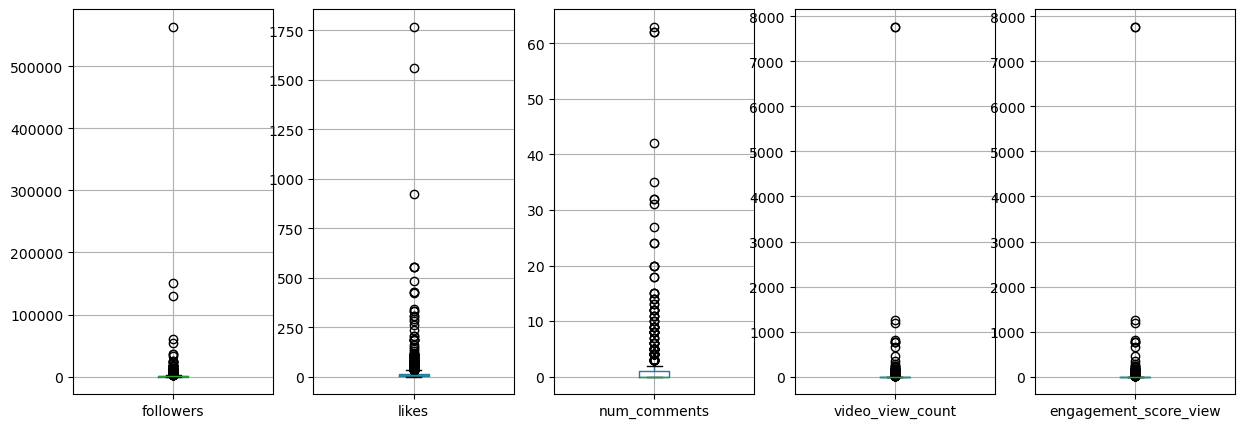

In [98]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))

#collumns :
# ['content_type', 'engagement_score_view', 'followers', 'likes',
#        'num_comments', 'product_type', 'video_view_count', 'videos', 'tags',
#        'has_a_person', 'vape_present', 'is_vaping', 'tone',
#        'img_mentions_brands', 'text_mentions_brands', 'Health_ad',
#        'target_demographic', 'location_type', 'emotion_displayed',
#        'type_of_content', 'stance', 'are_there_children', 'post_style',
#        'people_skin_color', 'people_gender', 'people_age_group',
#        'people_physical_attributes', 'people_hair_color',
#        'people_common_appearances', 'depiction_style', 'is_vape_related',
#        'sensitive_content_bool']
df.boxplot(column='followers', ax=ax[0])
df.boxplot(column='likes', ax=ax[1])
df.boxplot(column='num_comments', ax=ax[2])
df.boxplot(column='video_view_count', ax=ax[3])
df.boxplot(column='engagement_score_view', ax=ax[4])


plt.show()

In [99]:
#Outros pontos:
# Normalizar os dados


In [100]:
clean_col = df['people_gender'][df['people_gender'] != '[]']
clean_col_json = clean_col.apply(lambda x: eval(x))
possible_values = reduce(lambda x, y: set(x).union(y), clean_col_json)
possible_values

{'Female', 'Male', 'Other'}

In [101]:
clean_col_json.apply(lambda x: 'Female' in x)


3        True
18       True
20       True
21       True
22       True
        ...  
1392    False
1394    False
1395    False
1396     True
1397    False
Name: people_gender, Length: 426, dtype: bool

In [105]:
def list_column_count(df, column_name):
   col_json = df['people_gender'].apply(lambda x: eval(x))
   possible_values = reduce(lambda x, y: set(x).union(y), col_json)

   for value in possible_values:
      value_exists = col_json.apply(lambda x: list(x).count(value))
      df[f'{column_name}_{value}'] = value_exists

def list_column_binarize(df, column_name):
   col_json = df['people_gender'].apply(lambda x: eval(x))
   possible_values = reduce(lambda x, y: set(x).union(y), col_json)

   for value in possible_values:
      value_exists = col_json.apply(lambda x: 1 if value in x else 0)
      df[f'{column_name}_{value}'] = value_exists


def get_possible_values(df, column_name):
   col_json = df[column_name].apply(lambda x: eval(x))
   possible_values = reduce(lambda x, y: set(x).union(y), col_json)
   return possible_values

get_possible_values(df, 'tags')


{'2023',
 '2024',
 'ADHD',
 "Allen Carr's Easyway",
 'American Heart Association',
 'American Lung Association',
 'American flag',
 "April Fool's Day",
 'Australia',
 'Baby Yoda',
 'Black History Month',
 'CBQ method',
 'CDC',
 'COVID-19',
 'COVID19',
 'CT scan',
 'Canada',
 'Canadian Paediatric Society',
 'Cat in the Hat',
 'Catholic Charities',
 'Christmas',
 'City Laser Lab',
 'Earth',
 'Earth Day',
 'Expand Project',
 'FDA',
 'Fox News',
 'Halloween',
 'Harley Davidson',
 'Healthier Scotland',
 'ISTEP',
 'Independence Day',
 'Indigenous',
 'IowaSTEP',
 'JUUL',
 'Juul',
 'LGBT',
 'LGBTQ+',
 'Michigan',
 'Middle East',
 'Mumbai',
 'NCDHHS',
 'NHS',
 'NHS Scotland',
 'NRT',
 'Native Americans',
 'Nevada Dental Association',
 'New Year offers',
 'NicoBloc',
 'Nicotine 101',
 'North Dakota',
 'On!',
 'PBS News Hour',
 'Pasadena Hypnosis',
 'Pi Day',
 'Poornima University',
 'Puff Bar',
 'QiQi Lab',
 'Quit Center',
 'RSVP',
 'Reddit',
 'Singapore',
 'Spider-Man',
 "St. Patrick's Day",
 '

In [102]:

#listas de itens multiplos -> contagem
list_column_count(df, 'people_gender' )
list_column_count(df, 'people_skin_color' )
list_column_count(df, 'people_age_group' )
list_column_count(df, 'people_physical_attributes' )
list_column_count(df, 'people_common_appearances' )
list_column_count(df, 'people_skin_color' )

#listas de itens unicos -> binarização
list_column_binarize(df, 'target_demographic')
list_column_binarize(df, 'tags')

#categóricos

# content_type
# tone
# emotion_displayed
# stance
# depiction_style
# product_type
# location_type


#binários

# has_a_person
# vape_present
# is_vaping
# are_there_children
# Health_ad
# is_vape_related
# sensitive_content_bool
# img_mentions_brands
# text_mentions_brands

#numéricos

# engagement_score_view
# followers
# likes
# num_comments
# video_view_count


# NÃO ESTÁ CLARO

#post_style
#type_of_content

df

"""
content_type
engagement_score_view
followers
likes
num_comments
product_type
video_view_count
videos
tags
has_a_person
vape_present
is_vaping
tone
img_mentions_brands
text_mentions_brands
Health_ad
target_demographic
location_type
emotion_displayed
type_of_content
stance
are_there_children
post_style

people_age_group
people_physical_attributes
people_hair_color
people_common_appearances
depiction_style
is_vape_related
sensitive_content_bool

people_gender
people_skin_color
"""

,content_type,engagement_score_view,followers,likes,num_comments,product_type,video_view_count,videos,tags,has_a_person,...,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool,people_gender_Male,people_gender_Other,people_gender_Female
0,Image,0,1792,3,0,NaN,0,[],"['vaping', 'health warning', 'anti-vaping', 'n...",0,...,[],[],[],[],NaN,1,0,0,0,0
1,Image,0,159,2,0,NaN,0,[],"['infographic', 'teen brain', 'drug addiction'...",0,...,[],[],[],[],NaN,1,0,0,0,0
2,Image,0,10174,12,0,NaN,0,[],"['smoking', 'quit smoking', 'health', 'cigaret...",0,...,[],[],[],[],NaN,1,0,0,0,0
3,Image,0,9,3,0,NaN,0,[],"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,...,['Young'],[],[],['casual'],Neutral,1,0,1,0,1
4,Image,0,318,7,0,NaN,0,[],"['text message', 'gratitude', 'quitting smokin...",0,...,[],[],[],[],NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Image,0,521,71,3,NaN,0,[],"['outdoor', 'running', 'exercise', 'nature', '...",1,...,['Adult'],['average'],['other'],['casual'],Neutral,1,0,1,0,0
1396,Image,0,306,1,0,NaN,0,[],"['exercise', 'health', 'anti-vaping', 'diversi...",1,...,"['Young', 'Adult']",['average'],['black'],['casual'],Attractive,1,0,0,0,1
1397,Carousel,0,4501,13,0,NaN,0,[],"['quit smoking', 'addiction', 'cigarettes', 'h...",1,...,['Adult'],['average'],[],['casual'],Neutral,1,0,1,0,0
1398,Image,0,39,18,0,NaN,0,[],"['vaping', 'health', 'lungs', 'anti-vaping', '...",0,...,[],[],[],[],NaN,1,0,0,0,0


### observações:

- A coluna `type_of_content` não é uma lista, mas parece que os termos se recombinam. Quando tem dois termos, o primeiro parece ser um adjetivo sobre o segundo termo;


In [103]:
df.columns

Index(['content_type', 'engagement_score_view', 'followers', 'likes',
       'num_comments', 'product_type', 'video_view_count', 'videos', 'tags',
       'has_a_person', 'vape_present', 'is_vaping', 'tone',
       'img_mentions_brands', 'text_mentions_brands', 'Health_ad',
       'target_demographic', 'location_type', 'emotion_displayed',
       'type_of_content', 'stance', 'are_there_children', 'post_style',
       'people_skin_color', 'people_gender', 'people_age_group',
       'people_physical_attributes', 'people_hair_color',
       'people_common_appearances', 'depiction_style', 'is_vape_related',
       'sensitive_content_bool', 'people_gender_Male', 'people_gender_Other',
       'people_gender_Female'],
      dtype='object')